# **Phân cụm dữ liệu - Kmeans**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cbook
import seaborn as sns;sns.set()
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.patheffects as PathEffects
import random

In [2]:
df = pd.read_csv('new_data.csv')
df.head()


,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai
0,1,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,THPT_KHXH
1,1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,THPT_KHXH
2,1,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,THPT_KHXH
3,1,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,THPT_KHXH
4,1,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,THPT_KHXH


## **1. Phân cụm khối thi**

- Tạo list lưu 12 khối phổ biến nhất
- Từ điểm 3 môn cao nhất + độ phổ biến dự đoán khối thi của thí sinh => Đưa vào 1 cột mới 'khoi_thi'
- Nếu điểm 3 môn cao nhất không thuộc 12 khối phổ biến thì phải chọn 3 môn có tổng cao thứ 2


In [3]:
df_dt1 = df.loc[(df['phan_loai'] == 'THPT_KHXH') | (df['phan_loai'] == 'THPT_KHTN')]
df_dt2 = df.loc[(df['phan_loai'] == 'GDTX_KHXH') | (df['phan_loai'] == 'GDTX_KHTN')]
df_dt3 = df.loc[(df['phan_loai'] == 'DH_RETEST')]
df_dt4 = df.loc[(df['phan_loai'] == 'TH_RETEST')]

In [4]:
def sumhighest3subjects(row):
    col = ['A00', 'A01', 'A02', 'A07', 'B00', 'B03', 'B08', 'C00', 'C01', 'C02', 'D01', 'D07']
    temp = [row['toan'] + row['vat_li'] + row['hoa_hoc'],
    row['toan'] + row['vat_li'] + row['ngoai_ngu'],
    row['toan'] + row['vat_li'] + row['sinh_hoc'],
    row['toan'] + row['lich_su'] + row['dia_ly'],
    row['toan'] + row['sinh_hoc'] + row['hoa_hoc'],
    row['toan'] + row['sinh_hoc'] + row['ngu_van'],
    row['toan'] + row['sinh_hoc'] + row['ngoai_ngu'],
    row['ngu_van'] + row['lich_su'] + row['dia_ly'],
    row['ngu_van'] + row['toan'] + row['vat_li'],
    row['ngu_van'] + row['toan'] + row['hoa_hoc'],
    row['ngu_van'] + row['toan'] + row['ngoai_ngu'],
    row['hoa_hoc'] + row['toan'] + row['ngoai_ngu']]
    temp1 = []
    col1 =[]

    for i in range(12):
        if (~np.isnan(temp[i])):
            temp1.append(temp[i])
            col1.append(col[i])
    
    if (temp1):
        max_index = np.argmax(temp1)
        row['tong_diem_3_mon'] = temp1[max_index]
        row['khoi_thi'] = col1[max_index]
    else:
        row['tong_diem_3_mon'] = np.nan
        row['khoi_thi'] = np.nan
    return row

In [5]:
df_dt1 = df_dt1.apply(sumhighest3subjects, axis = 1)

In [6]:
df_dt1.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai,tong_diem_3_mon,khoi_thi
0,1,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,THPT_KHXH,13.75,C00
1,1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,THPT_KHXH,24.40,A07
2,1,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,THPT_KHXH,20.25,C00
3,1,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,THPT_KHXH,23.50,D01
4,1,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,THPT_KHXH,25.00,C00


In [7]:
df_dt2 = df_dt2.apply(sumhighest3subjects, axis = 1)

In [8]:
df_dt2.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai,tong_diem_3_mon,khoi_thi
11,1,1000012,6.4,7.50,NaN,NaN,NaN,NaN,4.75,5.00,8.00,GDTX_KHXH,17.25,C00
18,1,1000019,6.8,7.50,NaN,NaN,NaN,NaN,7.25,6.25,8.00,GDTX_KHXH,21.00,C00
20,1,1000021,8.0,9.00,NaN,NaN,NaN,NaN,7.00,6.25,8.75,GDTX_KHXH,22.25,C00
49,1,1000050,7.4,7.25,NaN,NaN,NaN,NaN,4.75,6.00,7.25,GDTX_KHXH,18.15,A07
73,1,1000074,7.6,6.50,NaN,7.5,2.5,1.75,NaN,NaN,NaN,GDTX_KHTN,21.60,C01


In [9]:
df_dt3 = df_dt3.apply(sumhighest3subjects, axis = 1)

In [10]:
df_dt3.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai,tong_diem_3_mon,khoi_thi
8,1,1000009,2.6,5.25,NaN,NaN,NaN,NaN,5.25,6.75,NaN,DH_RETEST,17.25,C00
13,1,1000014,5.8,5.50,6.4,NaN,NaN,NaN,8.50,8.00,NaN,DH_RETEST,22.30,A07
19,1,1000020,NaN,6.75,NaN,NaN,NaN,NaN,8.50,8.00,NaN,DH_RETEST,23.25,C00
43,1,1000044,2.6,3.00,NaN,NaN,NaN,NaN,2.00,4.50,NaN,DH_RETEST,9.50,C00
59,1,1000060,8.2,7.50,7.2,NaN,NaN,NaN,NaN,NaN,NaN,DH_RETEST,22.90,D01


In [11]:
df = pd.concat([df_dt1,df_dt2,df_dt3,df_dt4])

In [12]:
df.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai,tong_diem_3_mon,khoi_thi
0,1,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,THPT_KHXH,13.75,C00
1,1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,THPT_KHXH,24.40,A07
2,1,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,THPT_KHXH,20.25,C00
3,1,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,THPT_KHXH,23.50,D01
4,1,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,THPT_KHXH,25.00,C00


In [13]:
df.to_csv('data_khoi_thi.csv',index=False)

## **2. Khối thi**

- Tìm chỉ số k phù hợp cho Kmeans
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
- Chia ra các cụm (cluster)
- df.head() => Nhận xét điểm riêng từng cụm
- Đặt tên cho từng cụm

In [14]:
df = pd.read_csv('data_khoi_thi.csv')
df.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai,tong_diem_3_mon,khoi_thi
0,1,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,THPT_KHXH,13.75,C00
1,1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,THPT_KHXH,24.40,A07
2,1,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,THPT_KHXH,20.25,C00
3,1,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,THPT_KHXH,23.50,D01
4,1,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,THPT_KHXH,25.00,C00


In [15]:
df = df.fillna(0)
df.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai,tong_diem_3_mon,khoi_thi
0,1,1000001,3.6,5.00,4.0,0.0,0.0,0.0,2.75,6.0,8.75,THPT_KHXH,13.75,C00
1,1,1000002,8.4,6.75,7.6,0.0,0.0,0.0,8.50,7.5,8.25,THPT_KHXH,24.40,A07
2,1,1000003,5.8,7.50,5.0,0.0,0.0,0.0,7.25,5.5,8.75,THPT_KHXH,20.25,C00
3,1,1000004,7.4,7.50,8.6,0.0,0.0,0.0,7.50,6.5,7.50,THPT_KHXH,23.50,D01
4,1,1000005,7.2,8.50,9.0,0.0,0.0,0.0,8.00,8.5,8.25,THPT_KHXH,25.00,C00


#### Tìm chỉ số k thích hợp

In [16]:
df_Kmeans = df.loc[:,['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd']]
kmeans = np.array(list(zip(np.array(df_Kmeans['toan']), np.array(df_Kmeans['ngu_van']), np.array(df_Kmeans['ngoai_ngu']), np.array(df_Kmeans['vat_li']), np.array(df_Kmeans['hoa_hoc']), np.array(df_Kmeans['sinh_hoc']), np.array(df_Kmeans['lich_su']), np.array(df_Kmeans['dia_ly']), np.array(df_Kmeans['gdcd'])))).reshape(len(df_Kmeans),9)

In [17]:
K = range(1, 10)

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(kmeans)
    kmeanModel.fit(kmeans)

    distortions.append(sum(np.min(cdist(kmeans, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / kmeans.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(kmeans, kmeanModel.cluster_centers_,
                                'euclidean'), axis=1)) / kmeans.shape[0]
    mapping2[k] = kmeanModel.inertia_


c:\Users\tphat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tphat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tphat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tphat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

##### Biểu đồ Elbow theo độ biến dạng

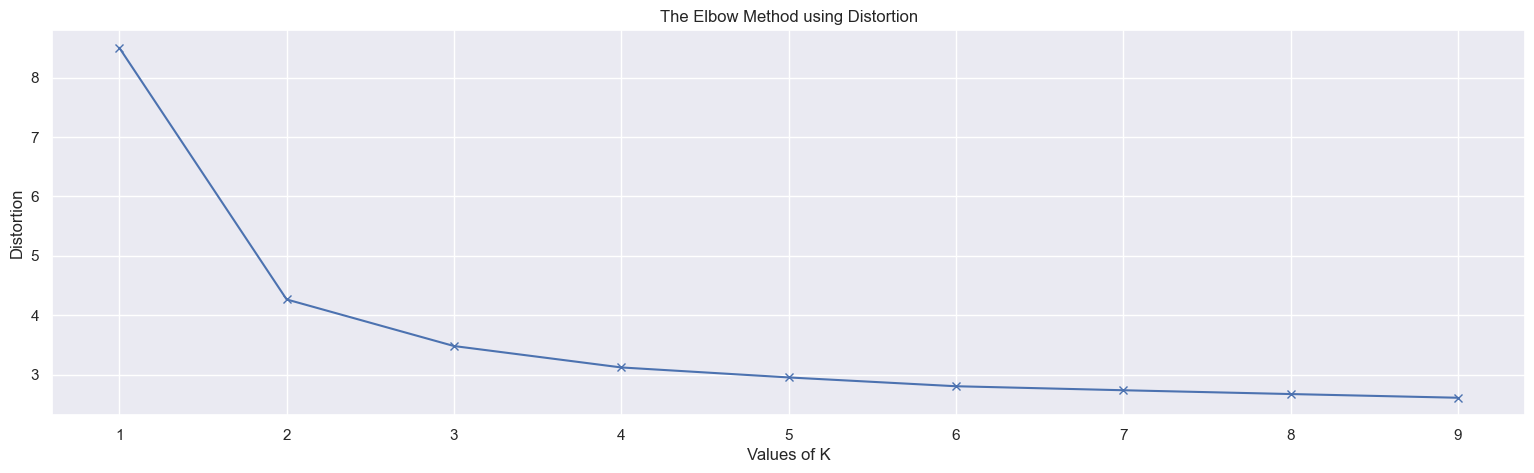

In [18]:
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

##### Biểu đồ Elbow theo quán tính

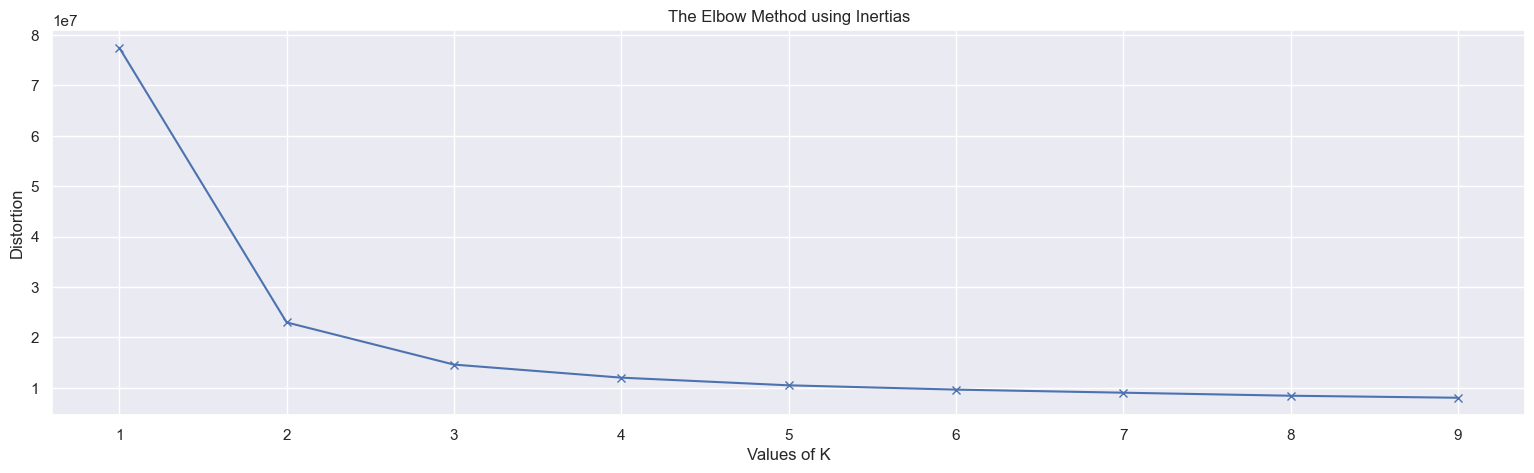

In [19]:
plt.figure(figsize = (19,5))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Inertias')
plt.show()

- Biểu đồ Elbow thể hiện giá trị biến dạng và quán tính tương ứng với từng giá trị của k
- Giá trị ở "Elbow" là giá trị tại đó, độ biến dạng và quán tính bắt đầu giảm theo kiểu tuyến tính
- Từ biểu đồ giá trị ở "Elbow" sẽ là 4, và từ 4 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 4

In [20]:
def kmeans_samples_data(X, label):
    X0 = pd.DataFrame(X[label == 0, :])
    X0.columns=['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lịch_su', 'dia_ly', 'gdcd']
    X1 = pd.DataFrame(X[label == 1, :])
    X1.columns=['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lịch_su', 'dia_ly', 'gdcd']
    X2 = pd.DataFrame(X[label == 2, :])
    X2.columns=['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lịch_su', 'dia_ly', 'gdcd']
    X3 = pd.DataFrame(X[label == 3, :])
    X3.columns=['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lịch_su', 'dia_ly', 'gdcd']
    return X0.sample(n = 5),X1.sample(n = 5),X2.sample(n = 5),X3.sample(n = 5)


In [21]:
Predict_Kmeans = KMeans(n_clusters=4).fit(kmeans)
def Centers(X):
    centers = []
    for i in range(len(X)):
        temp = []
        for j in range(9):
            temp.append(round(X[i][j],2))
        centers.append(temp)
    return centers
centers = pd.DataFrame(Centers(Predict_Kmeans.cluster_centers_))
centers.columns=['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lịch_su', 'dia_ly', 'gdcd']
print('Centers found by scikit-learn:')
print(centers)


c:\Users\tphat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centers found by scikit-learn:
   toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lịch_su  dia_ly  gdcd
0  5.07     5.86       3.48   -0.00     0.00      0.00     5.56    6.17  7.52
1  7.69     6.41       5.62    6.57     6.59      4.86    -0.00    0.00 -0.00
2  4.13     5.25       0.18    0.01     0.01      0.00     5.56    5.89  0.03
3  7.07     7.49       6.00   -0.00     0.00      0.00     7.42    7.41  8.59


##### Chia làm 4 nhóm

In [22]:
pred_label = Predict_Kmeans.predict(kmeans)
X0, X1, X2, X3 = kmeans_samples_data(kmeans,pred_label)

Nhóm một với đặc điểm, Toán 7.06, Ngữ Văn 7.47, Ngoại Ngữ 5.96, Vật lí 0, Hoá Học 0, Sinh học 0, Lịch Sử 7.41, Địa Lý 7.4, GDCD 8.59 => đặc điểm của các thí sinh nhóm KHXH với mức Khá

Dữ liệu ngẫu nhiên của Nhóm một

In [23]:
X0.head()

,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lịch_su,dia_ly,gdcd
175411,3.0,5.00,4.4,0.0,0.0,0.0,8.00,6.00,7.75
109748,5.0,7.25,3.4,0.0,0.0,0.0,4.75,6.00,7.00
206805,4.8,6.25,2.6,0.0,0.0,0.0,6.25,6.00,7.50
171605,3.0,3.75,4.4,0.0,0.0,0.0,6.00,5.50,6.00
88935,5.6,6.50,4.8,0.0,0.0,0.0,5.75,4.25,6.50


Nhóm hai với đặc điểm, Toán 7.69, Ngữ Văn 6.41, Ngoại Ngữ 5.62, Vật lí 6.57, Hoá Học 6.59, Sinh học 4.86, Lịch Sử 0, Địa Lý 0, GDCD 0 => đặc điểm của các thí sinh nhóm KHTN 

Dữ liệu ngẫu nhiên của Nhóm hai

In [24]:
X1.head()

,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lịch_su,dia_ly,gdcd
298956,7.8,6.00,7.0,7.75,5.75,7.25,0.0,0.0,0.0
219567,7.6,6.75,6.4,7.25,7.50,5.50,0.0,0.0,0.0
95074,7.8,7.25,3.0,4.50,5.25,4.00,0.0,0.0,0.0
121634,8.4,9.25,8.4,8.00,7.00,6.00,0.0,0.0,0.0
126683,8.0,6.00,7.2,8.25,8.25,6.00,0.0,0.0,0.0


Nhóm ba với đặc điểm, Toán 4.13, Ngữ Văn 5.25, Ngoại Ngữ 0.18, Vật lí 0.01, Hoá Học 0.01, Sinh học 0, Lịch Sử 5.56, Địa Lý 5.89, GDCD 0.03 => đặc điểm của các thí sinh thi đại học khối A07 và C00

Dữ liệu ngẫu nhiên của Nhóm ba

In [25]:
X2.head()

,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lịch_su,dia_ly,gdcd
9385,7.4,6.00,0.0,0.0,0.0,0.0,5.75,8.25,0.0
75472,5.0,7.00,0.0,0.0,0.0,0.0,4.25,6.25,0.0
53970,7.2,5.00,0.0,0.0,0.0,0.0,7.00,6.75,0.0
56525,2.2,6.25,0.0,0.0,0.0,0.0,4.50,6.50,0.0
36061,3.4,5.75,0.0,0.0,0.0,0.0,6.00,6.25,0.0


Nhóm bốn với đặc điểm, Toán 5.05, Ngữ Văn 5.84, Ngoại Ngữ 3.47, Vật lí 0, Hoá Học 0, Sinh học 0, Lịch Sử 5.54, Địa Lý 6.16, GDCD 7.5 => đặc điểm của các thí sinh nhóm KHXH với mức Trung

Dữ liệu ngẫu nhiên của Nhóm bốn

In [26]:
X3.head()

,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lịch_su,dia_ly,gdcd
178786,7.0,6.50,4.6,0.0,0.0,0.0,7.75,7.00,8.25
193356,8.6,6.75,6.0,0.0,0.0,0.0,10.00,6.25,9.25
230875,5.4,6.25,5.6,0.0,0.0,0.0,7.75,6.00,8.50
247437,7.0,6.75,6.4,0.0,0.0,0.0,8.00,8.25,8.75
62731,7.8,8.50,5.8,0.0,0.0,0.0,5.25,5.50,8.00
